In [1]:
import time

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import yfinance as yf

In [ ]:
!pip install yfinance

In [2]:
n = 0
data = pd.DataFrame()
while True or n<5:
    ativo = str(input('Digite o ticker da ação a ser analisada: ')).strip().upper()[0:4]
    print(f'Importando dados históricos de {ativo}!')
    time.sleep(0.5)
    # Obtendo dados históricos de ações
    try:
        df1 = yf.download(ativo, start = '2010-01-01', end = '2021-03-29')
        data[ativo] = df1['Adj Close']
        n += 1
    except:
        print('Ativo não encontrado, digite um ticker válido!')

    continua = str(input(f'Você deseja continuar? Você já importou {n} ativos! [S/N]')).strip().upper()[0]
    while continua not in 'SN':
        print('Resposta inválida!')
        continua = str(input(f'Você deseja continuar? Você já importou {n} ativos! [S/N]')).strip().upper()[0]
    if continua == 'N':
        break

Digite o ticker da ação a ser analisada: AMZN
Importando dados históricos de AMZN!


[*********************100%%**********************]  1 of 1 completed


Você deseja continuar? Você já importou 1 ativos! [S/N]S
Digite o ticker da ação a ser analisada: GOOG
Importando dados históricos de GOOG!


[*********************100%%**********************]  1 of 1 completed


Você deseja continuar? Você já importou 2 ativos! [S/N]S
Digite o ticker da ação a ser analisada: MSFT
Importando dados históricos de MSFT!


[*********************100%%**********************]  1 of 1 completed


Você deseja continuar? Você já importou 3 ativos! [S/N]S
Digite o ticker da ação a ser analisada: NFLX
Importando dados históricos de NFLX!


[*********************100%%**********************]  1 of 1 completed


Você deseja continuar? Você já importou 4 ativos! [S/N]N


In [3]:
print(df1.head())
print(data.head())
print(data.tail())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2010-01-04  7.931429  7.961429  7.565714  7.640000   7.640000  17239600
2010-01-05  7.652857  7.657143  7.258571  7.358571   7.358571  23753100
2010-01-06  7.361429  7.672857  7.197143  7.617143   7.617143  23290400
2010-01-07  7.731429  7.757143  7.462857  7.485714   7.485714   9955400
2010-01-08  7.498571  7.742857  7.465714  7.614286   7.614286   8180900
              AMZN       GOOG       MSFT      NFLX
Date                                              
2010-01-04  6.6950  15.610239  23.431597  7.640000
2010-01-05  6.7345  15.541497  23.439163  7.358571
2010-01-06  6.6125  15.149715  23.295321  7.617143
2010-01-07  6.5000  14.797037  23.053051  7.485714
2010-01-08  6.6760  14.994298  23.212034  7.614286
                  AMZN        GOOG        MSFT        NFLX
Date                                                      
2021-03-22  155.54350

In [4]:
# Análise exploratória
print(data.shape)
print(data.describe())
print(data.info)
print(data.isnull().sum())

(2827, 4)
              AMZN         GOOG         MSFT         NFLX
count  2827.000000  2827.000000  2827.000000  2827.000000
mean     45.344056    37.314391    66.268602   153.788484
std      43.627486    21.591824    55.769029   155.449006
min       5.430500    10.861040    17.580818     7.018571
25%      12.381500    17.223194    24.159722    30.542142
50%      25.527500    31.280500    41.419891    91.930000
75%      79.194500    53.854250    92.741024   288.669998
max     176.572495   106.415497   238.142258   586.340027
<bound method DataFrame.info of                   AMZN        GOOG        MSFT        NFLX
Date                                                      
2010-01-04    6.695000   15.610239   23.431597    7.640000
2010-01-05    6.734500   15.541497   23.439163    7.358571
2010-01-06    6.612500   15.149715   23.295321    7.617143
2010-01-07    6.500000   14.797037   23.053051    7.485714
2010-01-08    6.676000   14.994298   23.212034    7.614286
...                ... 

In [5]:
# tabela correlação
correlacao = data.corr()
print(correlacao)

          AMZN      GOOG      MSFT      NFLX
AMZN  1.000000  0.962903  0.985108  0.986167
GOOG  0.962903  1.000000  0.957286  0.960836
MSFT  0.985108  0.957286  1.000000  0.965365
NFLX  0.986167  0.960836  0.965365  1.000000


In [6]:
#Obtendo os retornos diários por ativo
retorno_ativo = data.pct_change()
retorno_ativo

,AMZN,GOOG,MSFT,NFLX
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.005900,-0.004404,0.000323,-0.036836
2010-01-06,-0.018116,-0.025209,-0.006137,0.035139
2010-01-07,-0.017013,-0.023280,-0.010400,-0.017254
2010-01-08,0.027077,0.013331,0.006896,0.017176
...,...,...,...,...
2021-03-22,0.011678,-0.002256,0.024484,0.021340
2021-03-23,0.008560,0.007049,0.006738,0.022902
2021-03-24,-0.016073,-0.003848,-0.008923,-0.026687


In [7]:
#Para calcular o retorno do porfolio como um todo, precisamos pensar na carteira como um todo, e para isso determinar o peso de cada ativo
pesos = []
for ativo in data:
    pesos.append(float(input(f'Qual o peso inicial a ser considerado para o ativo {ativo}? ')))
pesos

Qual o peso inicial a ser considerado para o ativo AMZN? 0.15
Qual o peso inicial a ser considerado para o ativo GOOG? 0.4
Qual o peso inicial a ser considerado para o ativo MSFT? 0.25
Qual o peso inicial a ser considerado para o ativo NFLX? 0.2


[0.15, 0.4, 0.25, 0.2]

In [8]:
# Para tratar do risco, começaremos entendendo o desvio padrão de cada ativo isoladamente
dvpd = data.std()
dvpd

AMZN     43.627486
GOOG     21.591824
MSFT     55.769029
NFLX    155.449006
dtype: float64

In [9]:
soma_retornos = retorno_ativo.sum()
soma_retornos

AMZN    3.687124
GOOG    2.256684
MSFT    2.647921
NFLX    5.675172
dtype: float64

In [10]:
# Para calcular o risco da carteira seguindo a teoria, não basta apenas multiplicar o risco individual pelo respectivo peso, pois
# é necessário considersr qual é o comportamento desses ativos em conjunto

retorno_medio_diario = retorno_ativo.mean()
print(retorno_medio_diario)
retorno_anual =  retorno_medio_diario * 252 
retorno_anual

AMZN    0.001305
GOOG    0.000799
MSFT    0.000937
NFLX    0.002008
dtype: float64


AMZN    0.328788
GOOG    0.201233
MSFT    0.236120
NFLX    0.506066
dtype: float64

In [11]:
# Agora é possível calcular o retorno do portfolio
retorno_portfolio = np.dot(retorno_anual, pesos)
retorno_portfolio

0.2900547534068276

In [12]:
#Matriz de covariância
matriz_cov = np.cov(retorno_ativo[1:].T)
matriz_cov

array([[0.00039747, 0.00018877, 0.0001699 , 0.00027012],
       [0.00018877, 0.00027141, 0.00016151, 0.00017998],
       [0.0001699 , 0.00016151, 0.00025572, 0.00016058],
       [0.00027012, 0.00017998, 0.00016058, 0.00105318]])

In [13]:
#Calculando o risco do portfolio (anualizado) segundo a fórmula
pesos = np.array(pesos)
risco = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov, pesos))) * np.sqrt(252)
risco

0.2455348614373226

In [14]:
# Cálculando o sharpe para efeito de exemplo com os pesos indicados
sharpe_atual = (retorno_portfolio - 0)/risco
sharpe_atual

1.1813180079964718

In [15]:
# Usando conceito de Sharpe Ratio para entender a atratividade do investimento e obter a melhor de distribuição de pesos para a carteira informada
# Consideraremos o risco livre = 0 como padrão
def simulando_carteiras(data, num_portfolios = 100000, risco_livre = 0):
    pesos_port = []
    retornos_port = []
    var_port = []
    sharpe_port = []
    
    # Retorno individual dos ativos
    retorno_ativos = data.pct_change()
    retorno_medio_anual = retorno_ativos.mean() * 252
    
    # Matriz de Covariância
    matriz_cov = np.cov(retorno_ativos[1:].T)
    
    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(data.columns))
        pesos = k / sum (k)

        # retorno
        retorno_total = np.dot(retorno_medio_anual, pesos)

        # risco
        risco = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov, pesos))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (retorno_total - risco_livre)/risco

        pesos_port.append(pesos)
        retornos_port.append(retorno_total)
        var_port.append(risco)
        sharpe_port.append(sharpe)
    
    carteiras = {'pesos': pesos_port,
              'retornos': retornos_port,
              'risco': var_port,
              'sharpe': sharpe_port}

    return carteiras

In [16]:
# Encontrando a melhor carteira gerada
def melhor_carteira(carteiras):
    sharpe = carteiras['sharpe']
    pesos = carteiras['pesos']
    risco = carteiras['risco']
    retorno = carteiras['retornos']
    
    indice_melhor_sharpe = np.array(sharpe).argmax()
    
    return sharpe[indice_melhor_sharpe],pesos[indice_melhor_sharpe], retorno[indice_melhor_sharpe],risco[indice_melhor_sharpe]

In [17]:
carteiras_port = simulando_carteiras(data)

In [18]:
melhor_carteira(carteiras_port)

(1.2598435970114368,
 array([3.77293290e-01, 3.69041000e-04, 3.71548636e-01, 2.50789034e-01]),
 0.3387698710412388,
 0.2688983551965169)

In [19]:
def plot_efficient_frontier(wallets, retorno_atual = 0, risco_atual = 0, carteiras_mel = []):
    vol = wallets['risco']
    returns = wallets['retornos']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]
    
        
    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    if carteiras_mel == []:
        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]
        plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    else:
        indice = np.array(carteiras_mel['sharpe']).argmax()
        y_axis = carteiras_mel['retornos'][indice]
        X_axis = carteiras_mel['risco'][indice]
        plt.scatter(X_axis, y_axis, c = 'red', s = 50)

    if risco_atual != 0:
        y_axis2 = retorno_atual
        X_axis2 = risco_atual
        plt.scatter(X_axis2, y_axis2, c = 'black', s = 50)
        # Criar artistas fictícios para a legenda
        red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Carteira com Maior Eficiência')
        black_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Carteira Atual')

        # Adicionar legenda manualmente
        plt.legend(handles=[red_dot, black_dot])
        
    plt.title("Fronteira Eficiente")
    plt.xlabel("Volatilidade")
    plt.ylabel("Retorno Esperado")
    plt.show()

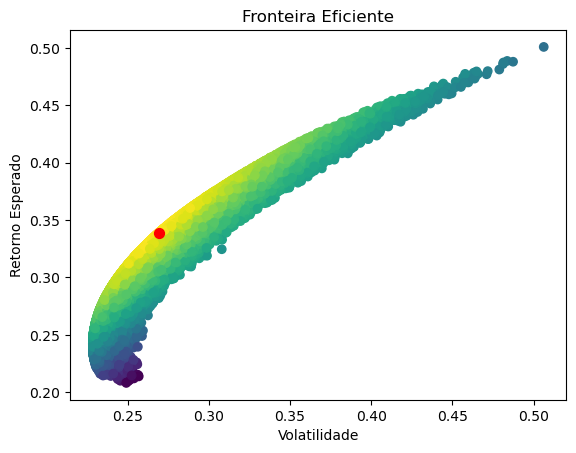

In [20]:
plot_efficient_frontier(carteiras_port)

In [23]:
# Sabe-se que as estratégias podem variar conforme o investidor e seus objetivos de acordo com a tolerância ao risco
# Procurando carteira com nível menor ou igual ao risco da carteira atual informada anteriormente

def carteira_limitada_riscoatual(data, risco_max, retorno_atual,  num_portfolios = 10000000, risco_livre = 0):
    pesos_port = []
    retornos_port = []
    var_port = []
    sharpe_port = []
    N = num_portfolios
    
    # Retorno individual dos ativos
    retorno_ativos = data.pct_change()
    retorno_medio_anual = retorno_ativos.mean() * 252
    
    # Matriz de Covariância
    matriz_cov = np.cov(retorno_ativos[1:].T)
    
    i = 1
    fim = 0
    n = 1
    risco_min = 2*risco_max
    
    while i <= 10 and fim <= 3 and n <= N*10:
        
        # gerando pesos aleatórios
        k = np.random.rand(len(data.columns))
        pesos = k / sum (k)
        n +=1
        
        # risco
        risco = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov, pesos))) * np.sqrt(252)
        
        if risco <= risco_min:
            risco_min = risco
            # retorno
            retorno_total_rmin = np.dot(retorno_medio_anual, pesos)
            # sharpe ratio
            sharpe_rmin = (retorno_total_rmin - risco_livre)/risco_min
            pesos_min = pesos
        
        if risco<=risco_max:
            i +=1
            
            # retorno
            retorno_total = np.dot(retorno_medio_anual, pesos)

            # sharpe ratio
            sharpe = (retorno_total - risco_livre)/risco
        
            if retorno_total > retorno_atual:
                pesos_port.append(pesos)
                retornos_port.append(retorno_total)
                var_port.append(risco)
                sharpe_port.append(sharpe)
                fim +=1
                
    carteiras = {'pesos': pesos_port,
              'retornos': retornos_port,
              'risco': var_port,
              'sharpe': sharpe_port}
    
    if fim == 0:
        print('Nenhuma carteira com retorno melhor e risco menor ou igual ao atual foi encontrada!')
        print(f'''A carteira que teve valor mais próximo de risco foi: \n
        risco: {risco_min}\n
        retorno: {retorno_total_rmin}\n
        sharpe: {sharpe_rmin}\n
        pesos: {pesos_min}''')
        
    return carteiras

In [24]:
carteiras_melhores = carteira_limitada_riscoatual(data, risco, retorno_portfolio)
carteiras_melhores

{'pesos': [array([0.32645605, 0.32361885, 0.21494239, 0.13498271])],
 'retornos': [0.2915201260015287],
 'risco': [0.24429945845890777],
 'sharpe': [1.1932901032220817]}

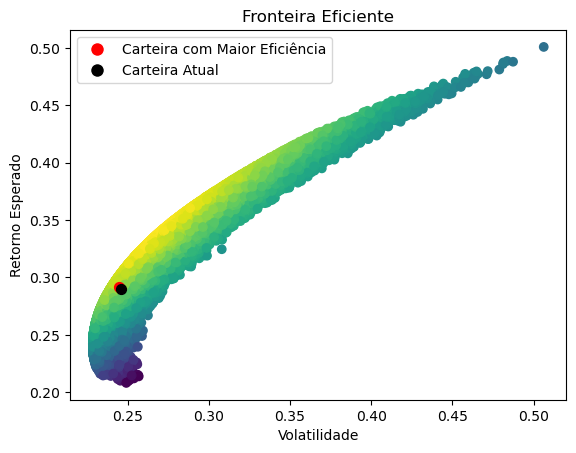

In [25]:
if carteiras_melhores['pesos'] != []:
    plot_efficient_frontier(carteiras_port, retorno_portfolio, risco, carteiras_melhores)

In [26]:
if carteiras_melhores['pesos'] != []:
    melhor_carteira(carteiras_melhores)

In [28]:
if carteiras_melhores['pesos'] != []:
    tab_comparacao = pd.DataFrame({'Carteira Atual': [sharpe_atual, retorno_portfolio, risco, pesos[:]], 
                               'Carteira Mais Eficiente': [melhor_carteira(carteiras_melhores)[0], melhor_carteira(carteiras_melhores)[2], melhor_carteira(carteiras_melhores)[3], melhor_carteira(carteiras_melhores)[1][:]],
                              'Carteira Melhor Sharpe': [melhor_carteira(carteiras_port)[0], melhor_carteira(carteiras_port)[2], melhor_carteira(carteiras_port)[3], melhor_carteira(carteiras_port)[1][:]]})

In [29]:
if carteiras_melhores['pesos'] != []:
    tab_comparacao = tab_comparacao.explode(['Carteira Atual', 'Carteira Mais Eficiente', 'Carteira Melhor Sharpe'])

In [30]:
acoes = []
for i in data.columns:
    acoes.append(i)
acoes
indices = ['Sharpe', 'Retorno', 'Risco']
for i in acoes:
    indices.append(i)
indices

['Sharpe', 'Retorno', 'Risco', 'AMZN', 'GOOG', 'MSFT', 'NFLX']

In [31]:
if carteiras_melhores['pesos'] != []:
    tab_comparacao.index = indices

In [33]:
if carteiras_melhores['pesos'] != []:
    print(tab_comparacao)
else:
    print('Não foram encontradas carteiras melhores')

        Carteira Atual Carteira Mais Eficiente Carteira Melhor Sharpe
Sharpe        1.181318                 1.19329               1.259844
Retorno       0.290055                 0.29152                0.33877
Risco         0.245535                0.244299               0.268898
AMZN              0.15                0.326456               0.377293
GOOG               0.4                0.323619               0.000369
MSFT              0.25                0.214942               0.371549
NFLX               0.2                0.134983               0.250789
